# Intro To Statistics


Syllabus 
- Descrete random variables and their characteristics 
- Continous random variables 
- Normal distribution 
- Sampling 
- Statistical analysis 
- Central limit theorem 



# Random variable

Random variable is the variable that at testing acquires the **one from all possible values with some probability**.
<br>It is not known in advance what concrete possible value it will acquire because it depends on **random causes**.

A random variable can be either **discrete** (having specific values) or **continuous** (any value in a continuous range).

# Distributions

A statistical distribution, or probability distribution, describes **how values of random variable are distributed** - it shows which **values are common and uncommon**

In other words, probability distribution it is the mapping between the possible values and probabilities.


## Discrete Distribution vs. Continous Distribution

Discrete distribution is one that represents the **discrete variables**, then a continuous distribution is one that graphs **continuous variables**.

## Discrete Distributions

Table format presenting of **discrete variable** of flipping 2 dice:
<table style="width:60%">
    <tr>
        <td>X</td>
        <td>2 </td>
        <td>3 </td>
        <td>4</td>
        <td>5 </td>
        <td>6 </td>
        <td>7 </td>
        <td>8 </td>
        <td>9</td>
        <td>10 </td>
        <td>11 </td>
        <td>12 </td>
    </tr>
    <tr>
        <td>P</td>
        <td>1/36 </td>
        <td>2/36 </td>
        <td>3/36</td>
        <td>4/36 </td>
        <td>5/36 </td>
        <td>6/36 </td>
        <td>5/36 </td>
        <td>4/36</td>
        <td>3/36 </td>
        <td>2/36 </td>
        <td>1/36 </td>
    </tr>
    </table>


The distribution may be presented in analytical format - expression: 
$$p_{k} = P(X=x_k), k= \overline{(1,n)}$$



### Uniform distribution 
$$p_{k} =1/n, k= \overline{(1,n)}$$

### Binomial Distribution

`Bernoulli's trials` (`Binomial Trials`) are those trials in probability where only two possible outcomes are `Success` and `Failure` or `True` and `False`.

Binomial Distribution is the sequence of independent experiments with each experiment being a binomial trial.

$X$ is the random variable that rpresents the number of occurrences of the event in $n$ trials.


$$p_{m}=P(X=m) = C_{n}^m p^m q^{n-m}, \quad m= (\overline{0,n}), \quad q= 1-p$$

$C_{n}^m$ - number of combinations:
$$C_{n}^m = \frac{n!}{m! (n-m)!}$$


#### manual calculation of factorial 

In [22]:
def factorial(n): 
    fact = 1
    for i in range(1, n+1):
        fact = fact * i
    return fact
factorial(3), factorial(6)

(6, 720)

#### factorial implementation from `math`

In [23]:
import math
math.factorial(6)

720

#### manual combinations number

In [24]:
def combinations(m,n):
    return int (factorial(n)/factorial(m)/factorial(n-m))

combinations(m=3,n=5)

10

#### implementation of combinations number from `itertools`
It provides not the number but real combinations 

In [25]:
import numpy as np
import itertools
m = 3
n = 5 
data = np.arange (n)
combinations_iter = list(itertools.combinations(data, m))
len(combinations_iter), combinations_iter 

(10,
 [(0, 1, 2),
  (0, 1, 3),
  (0, 1, 4),
  (0, 2, 3),
  (0, 2, 4),
  (0, 3, 4),
  (1, 2, 3),
  (1, 2, 4),
  (1, 3, 4),
  (2, 3, 4)])

####  manual implementation of binomial distribution probability 


In [26]:
def binomial_prob(m,n,p):
    return combinations(m,n) * p**m * (1-p)**(n-m)

binomial_prob(m=10,n = 12, p=0.6)

0.06385228185599999

#### implementation of binomial distribution probability  from `scipy`


In [27]:
from scipy.stats import binom
binom.pmf(k=10, n=12, p=0.6)

0.063852281856

#### check normalization of distribution 

$$\sum p_k=1 $$  

In [28]:
n = 10
bin_distr = [binom.pmf(k=m, n=n, p=0.6) for m in range(n+1)] # n+1 due to the case of n occurrences from n trials 
print ('check: ', sum(bin_distr))
bin_distr

check:  0.9999999999999994


[0.00010485760000000006,
 0.001572863999999999,
 0.010616832000000003,
 0.042467327999999964,
 0.11147673600000009,
 0.20065812479999992,
 0.2508226559999998,
 0.21499084799999976,
 0.12093235199999987,
 0.04031078399999997,
 0.006046617599999997]

In [29]:
# Lets check manual implementation
n = 10
bin_distr = [binomial_prob(m,n,p=0.6) for m in range(n+1)] 
print ('check: ', sum(bin_distr))
bin_distr

check:  1.0


[0.00010485760000000006,
 0.0015728640000000006,
 0.010616832000000005,
 0.042467328000000006,
 0.11147673600000003,
 0.20065812480000003,
 0.25082265600000003,
 0.21499084799999998,
 0.12093235199999998,
 0.04031078399999999,
 0.006046617599999997]

### Geometrical distribution

$X$ is the random variable that represents the number of `Bernoulli's trials` till the event occurred.

$$p_{n}=q^{n-1}p, \quad n= (\overline{1,\infty})$$

$p$ - probability of event in each independent trial 


### Characteristics of descrete distributions

Expected Value (*математичне сподівання*) 
$$ M(X) = \sum_{i=1}^nx_i  p_i $$ 

$i$ may be from $1$ to $n$  for finite set of values  or from $1$ to $\infty$ in case of countable infinite set of values

Dispersion:
$$ D(X) = M[X-M(X)]^2 = M[X^2]- [M(X)]^2  = \sum_{i=1}^n x_i^2  p_i  - [M(X)]^2$$ 

Standard deviation: 
$$ \sigma(X) = \sqrt {D(X)}$$


#### Characteristics of uniform distribution  
$$ M(X) = \frac{a_1+a_n}{2},  \quad  D(X) = \frac{(a_n-a_1+1)^2-1}{12}$$

#### Characteristics of binomial distribution
$$ M(X) = np,  \quad  D(X) = npq$$

#### Characteristics of geometrical distribution
$$ M(X) = \frac{1}{p},  \quad  D(X) = \frac {q}{p^2}$$


## Continuos Distributions

### Cumulative distribution function (функція розподілу ймовірностей)
`CDF` is the probability of random variable `X` will acquire the value less than argument `x`
$$F(x) = P(X<x) $$

Note: 
-  CDF is non-decreasing function: for $x_1 < x_2$ leads to $F(x_1) \geq F(x_2)$ 
- $P(a \leq X \leq b) = F(b)- F(a)$  
- Probability of random variable `X` will acquire the ceratin value $x_1$ :  $P(X = x_1) = 0$. It means when $X$ is continuous, we can ignore  the endpoints of intervals while finding probabilities of continuous random variables  

### Probability density function (густина розподілу ймовірностей)

`PDF` is function $f(x)$ which is derivative of $F(x)$: $f(x) = F'(x)$

Note: 
- $\int_{-\infty}^{\infty} f(x) \,dx = 1 $

- $P(a \leq X \leq b) = \int_{a}^{b} f(x) \,dx$


<img src = "pdf.jpg" height=500 width= 800 align="left">

### Characteristics of continuos distributions


Expected Value (*математичне сподівання*) 
$$ M(X) = \int_{-\infty}^{\infty} x f(x) \,dx $$ 

$i$ may be from $1$ to $n$  for finite set of values  or from $1$ to $\infty$ in case of countable infinite set of values

Dispersion:
$$ D(X) = \int_{-\infty}^{\infty}[X-M(X)] ^2 f(x)  \,dx   =  \int_{-\infty}^{\infty}x^2 f(x)  \,dx - [M(X)]^2$$ 

Standard deviation: 
$$ \sigma(X) = \sqrt {D(X)}$$


### Normal distribution 

$$ f(x)= \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x-a)^2}{2\sigma^2}}$$

Note: 
$$a= M(x), \sigma= \sigma(X)$$

**Standard** Normal distribution Curve ($a=0, \sigma=1$) 
$$ f(x)= \frac{1}{ \sqrt{2\pi}} e^{-\frac{x^2}{2}}$$

#### Normal distribution curve (Gauss curve or Bell curve)

In [30]:
import numpy as np 
import matplotlib.pyplot as plt

def f_gauss(x):
    return np.exp(-x**2 / 2)/ np.sqrt(2*np.pi)

f_gauss(-5),f_gauss(-1), f_gauss(0),  f_gauss(1), f_gauss(2), f_gauss(5)

(1.4867195147342979e-06,
 0.24197072451914337,
 0.3989422804014327,
 0.24197072451914337,
 0.05399096651318806,
 1.4867195147342979e-06)

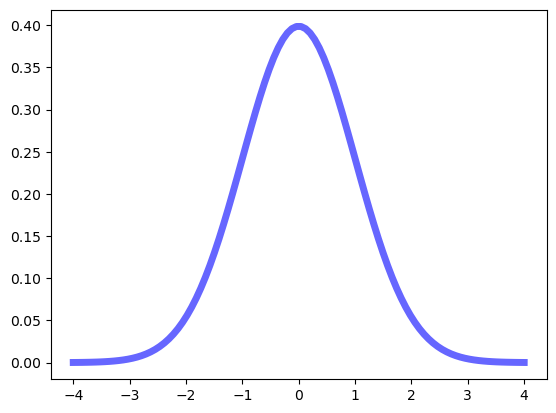

In [31]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(-4 ,4, 100)
ax.plot(x, f_gauss(x),'b-', lw=5, alpha=0.6, label='Gauss')

For normal distribution, the **probability of random variable `X` will acquire the  value from interval $(\alpha,\beta)$** is calculated be the following formula: 
$$P(\alpha \leq X \leq \beta) = \Phi(\frac{\beta-a}{\sigma})-\Phi ( \frac{\alpha-a}{\sigma}) $$

Here the $ \Phi(z)$ is the **Laplas** Function, which is calculated as integral:

$$ \Phi(z)=  \int_0^{z}f(x) dx = \frac{1}{\sqrt{2\pi}}\int_0^{z}e^{-\frac{x^2}{2}}dx$$




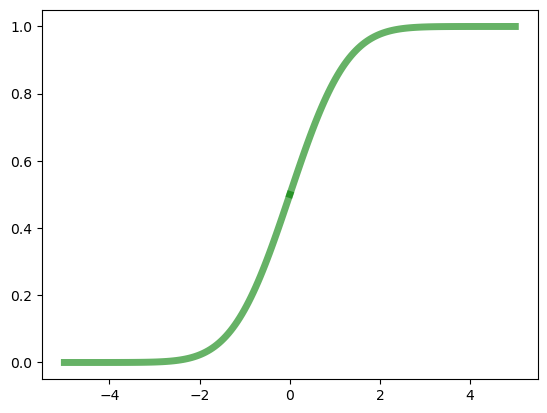

In [32]:
from scipy import integrate
import numpy as np


def f_gauss(x):
    return np.exp(-x**2 / 2)/ np.sqrt(2*np.pi)

def f_laplas(z): 
      return integrate.quad(f_gauss, 0.0, z) [0]

v_laplas= np.vectorize (f_laplas)
z = np.linspace(0 ,5, 100)

# v_laplas(z)

fig, ax = plt.subplots(1, 1)
# shifted to 0.5 since Laplas function is calculated from 0 to z, so for negative z 
# proper ap[proach would be to calculate the integral from -inf to value
ax.plot(z, v_laplas(z)+0.5,'g-', lw=5, alpha=0.6, label='Gauss')
ax.plot(-z, -v_laplas(z)+0.5,'g-', lw=5, alpha=0.6, label='Gauss')

The **Laplas** Function represents the area under Normal distribution curve

Text(1, 0.35, 'f(x)')

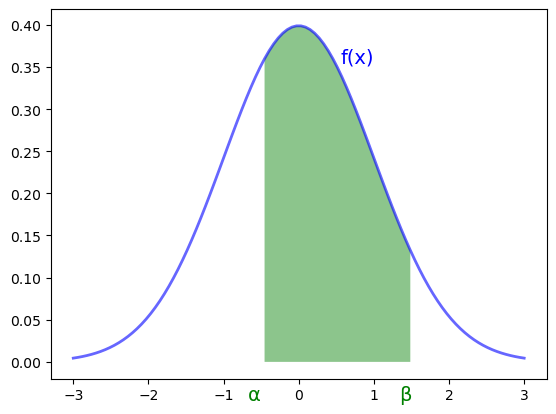

In [33]:
alpha, beta  = -0.5,1.5
fig, ax = plt.subplots(1, 1)
x = np.linspace(-3 ,3, 100)
ax.plot(x, f_gauss(x),'b-', lw=2, alpha=0.6, label='Gauss')
x_range = x[(x>alpha)&(x<beta)]
ax.fill_between(x_range, 0,f_gauss(x_range) , facecolors='green',alpha=0.45)  
ax.text(alpha, -0.05 ,'\u03B1', ha= 'right', va= 'bottom',color= 'green',fontsize= 14)
ax.text(beta, -0.05 ,'\u03B2' , ha= 'right', va= 'bottom',color= 'green',fontsize= 14)
ax.text(1, 0.35 ,'f(x)', ha= 'right', va= 'bottom',color= 'blue',fontsize= 14)



The probability of deviation of normally distributed random variable from $a$ not more than $\epsilon$ could be calculated by the formula: 

$$P(|X-a| < \epsilon) = 2 \Phi(\frac{\epsilon}{\sigma})$$

Text(1, 0.35, 'f(x)')

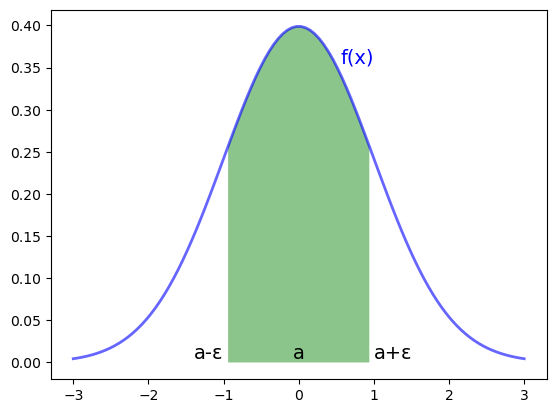

In [34]:
eps  = 1
fig, ax = plt.subplots(1, 1)
x = np.linspace(-3 ,3, 100)
ax.plot(x, f_gauss(x),'b-', lw=2, alpha=0.6, label='Gauss')
x_range = x[(x>-eps)&(x<eps)]
ax.fill_between(x_range, 0,f_gauss(x_range) , facecolors='green',alpha=0.45)  
ax.text(-eps, 0 ,'a-\u03B5', ha= 'right', va= 'bottom',color= 'black',fontsize= 14)
ax.text(eps, 0 ,'a+\u03B5', ha= 'left', va= 'bottom',color= 'black',fontsize= 14)
ax.text(0, 0 ,'a', ha= 'center', va= 'bottom',color= 'black',fontsize= 14)
ax.text(1, 0.35 ,'f(x)', ha= 'right', va= 'bottom',color= 'blue',fontsize= 14)



#### Implementation of `pdf`  and `cdf`   from `scipy`


#### `pdf` implemenation 

In [35]:
from scipy.stats import norm
norm.pdf(0) # probabilistic density fuction 

0.3989422804014327

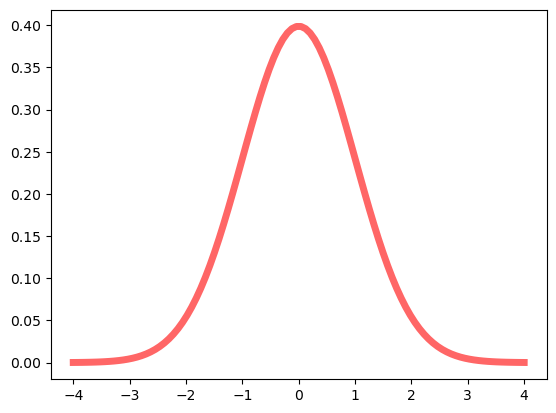

In [36]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(1, 1)

x = np.linspace(-4,4, 100)

ax.plot(x, norm.pdf(x),'r-', lw=5, alpha=0.6, label='norm pdf')

#### `cdf` implemenation 

Area 

In [37]:
norm.cdf(-1),  norm.cdf(0),  norm.cdf(1)

(0.15865525393145707, 0.5, 0.8413447460685429)

In [38]:
area_values = norm.cdf(x)
area_values

array([3.16712418e-05, 4.44231742e-05, 6.19233895e-05, 8.57837169e-05,
       1.18103990e-04, 1.61598982e-04, 2.19751580e-04, 2.96995550e-04,
       3.98931102e-04, 5.32576001e-04, 7.06654332e-04, 9.31923968e-04,
       1.22154241e-03, 1.59146888e-03, 2.06089818e-03, 2.65271952e-03,
       3.39398992e-03, 4.31640908e-03, 5.45677857e-03, 6.85742491e-03,
       8.56656243e-03, 1.06385691e-02, 1.31341457e-02, 1.61203278e-02,
       1.96703190e-02, 2.38631167e-02, 2.87829020e-02, 3.45181740e-02,
       4.11606119e-02, 4.88036603e-02, 5.75408414e-02, 6.74638118e-02,
       7.86601927e-02, 9.12112197e-02, 1.05189266e-01, 1.20655313e-01,
       1.37656443e-01, 1.56223449e-01, 1.76368649e-01, 1.98084004e-01,
       2.21339621e-01, 2.46082740e-01, 2.72237254e-01, 2.99703828e-01,
       3.28360643e-01, 3.58064784e-01, 3.88654236e-01, 4.19950465e-01,
       4.51761512e-01, 4.83885505e-01, 5.16114495e-01, 5.48238488e-01,
       5.80049535e-01, 6.11345764e-01, 6.41935216e-01, 6.71639357e-01,
      

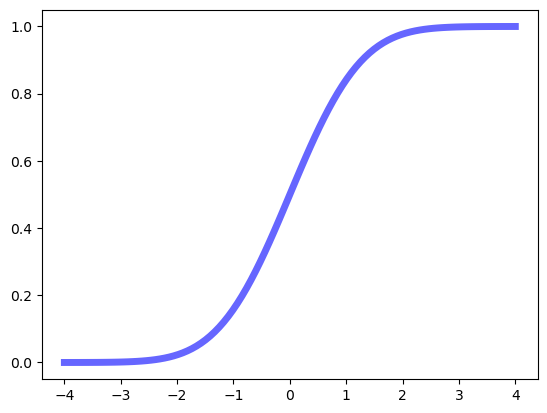

In [39]:
plt.figure()
plt.plot(x, norm.cdf(x),'b-', lw=5, alpha=0.6, label='cdf')


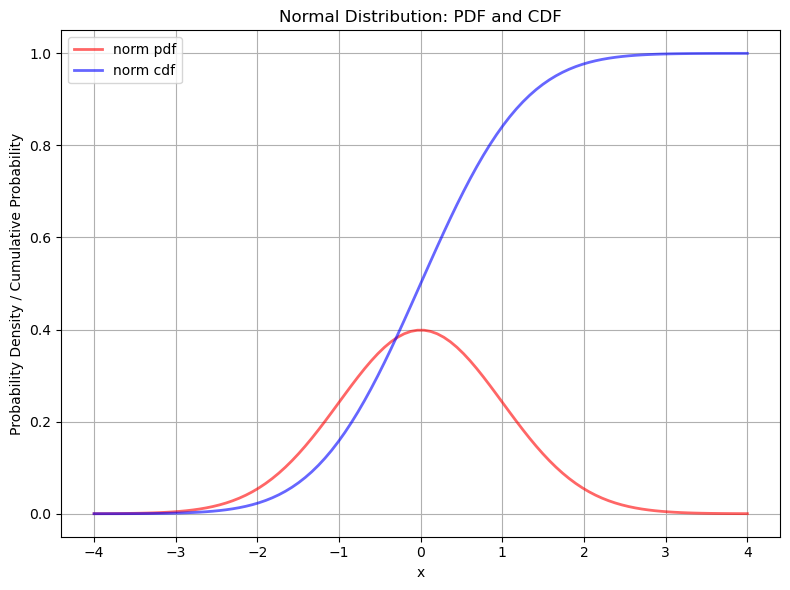

In [40]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, norm.pdf(x), 'r-', lw=2, alpha=0.6, label='norm pdf')
ax.plot(x, norm.cdf(x), 'b-', lw=2, alpha=0.6, label='norm cdf')

ax.set_xlabel('x')
ax.set_ylabel('Probability Density / Cumulative Probability')
ax.set_title('Normal Distribution: PDF and CDF')
ax.legend()  
ax.grid(True)

# Display the plot
plt.tight_layout() # Adjust the layout so that the elements fit in the figure
plt.show()

### Uniform distribution 

Probability dencity function: 

$$f(x) = \begin{cases}
            \frac{1}{(b-a)}, \text{if}  \, x \in [a,b] \\
            0, \text{if} \, x \notin [a,b]  \\
        \end{cases}$$
        
Then, `cdf`: 
$$F(x) = \begin{cases}
            0, \text{if}  \, x < a \\
            \frac{x-a}{(b-a)}, \text{if}  \,  a \leq x  \leq b\\
            1, \text{if}  \, x > b \\
        \end{cases}$$


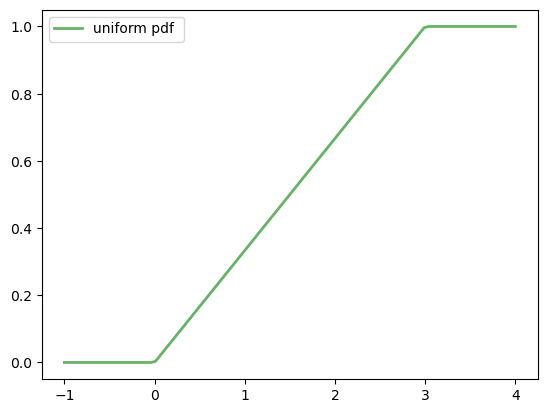

In [41]:
def pdf_uniform(x,a,b):
    if x<a: return 0 
    if x>b: return 1 
    return (x-a)/(b-a)


pdf_uniform_v = np.vectorize (pdf_uniform,otypes=[np.float64])
fig, ax = plt.subplots(1, 1)
x = np.linspace(-1,4, 100)
a,b= 0,3
ax.plot(x,pdf_uniform_v (x,a,b),'g-', lw=2, alpha=0.6, label='uniform pdf ')

plt.legend()

# Sampling 

Sampling is the process of executing trials for some distribution and observing factual evidences.  

Note: Before sampling we are talking about **probability distribution**, but having data we may now talk about **statistical distribution**

So there are following scenarious: 
- Probability distribiution  -> Sampling 
- Known dataset -> Calcularte statistical distribition -> Probability distribiution  -> Sampling 
- Unknown general dataset -> Sampling (<вибірка>) -> Compute statistical distribition -> Estimate of distribution of general dataset



## Uniform distribution 

Return random integers from the `discrete uniform` distribution of the specified dtype in the “half-open” interval [low, high). If high is None (the default), then results are from [0, low).

In [42]:
import seaborn as  sns 

/home/work/.local/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/work/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


### `np.random.uniform`

In [43]:
import numpy as np 
a_uniform= np.random.uniform(low=0.0, high=1.0, size=100000)
a_uniform [:5]

array([0.34080671, 0.54610179, 0.22451027, 0.92305233, 0.72050314])

<AxesSubplot:ylabel='Count'>

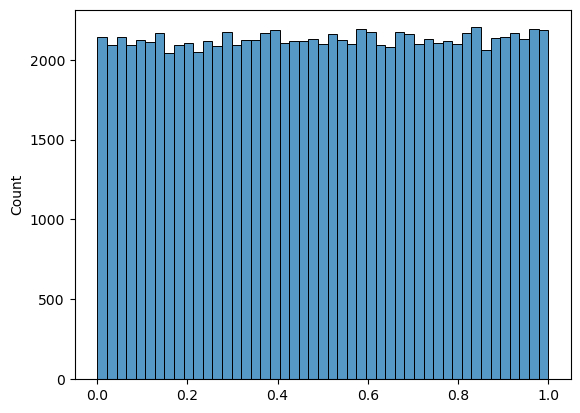

In [44]:
sns.histplot(a_uniform)

### `np.random.randint`


<AxesSubplot:ylabel='Count'>

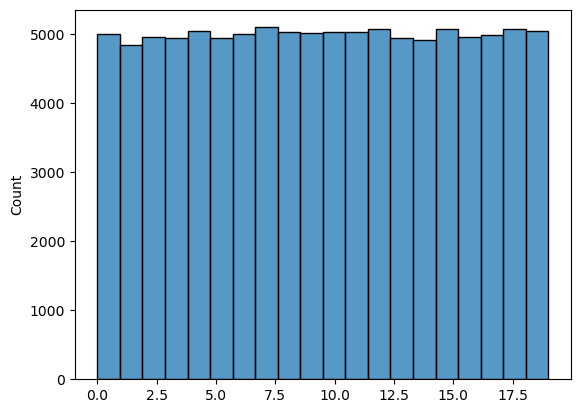

In [45]:
a_randint = np.random.randint(20,size= (100000))
sns.histplot(a_randint, bins = 20)

### `np.random.randn`

In [46]:
np.random.randn(3,4) 

array([[ 0.69580558,  0.3669092 ,  0.81773694, -1.06991876],
       [ 1.51879174, -0.67080906, -1.7732737 ,  0.5859093 ],
       [-0.849653  , -1.40044971,  0.38829284, -1.16510424]])

<AxesSubplot:ylabel='Count'>

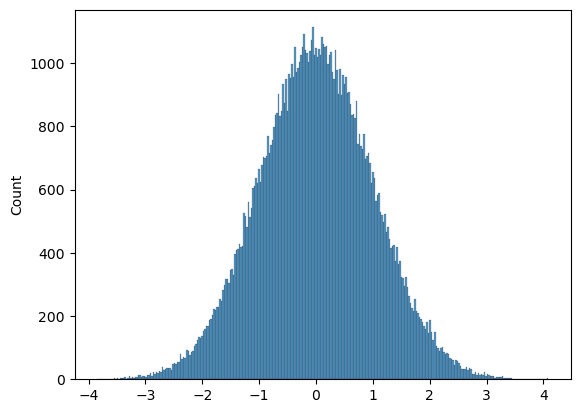

In [47]:
a_randn = np.random.randn(100000)
sns.histplot (a_randn, bins = 300)

<AxesSubplot:ylabel='Count'>

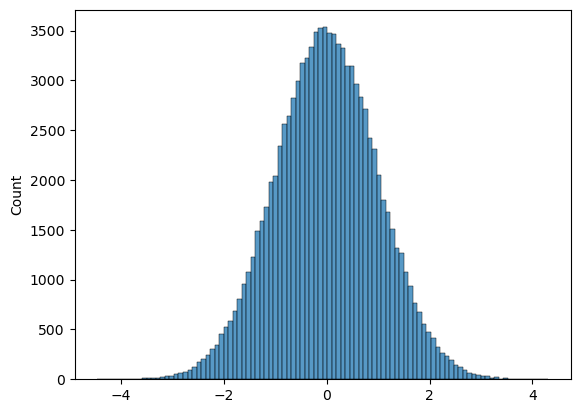

In [48]:
a_randn = np.random.randn(100000)
sns.histplot (a_randn, bins = 100)

### `np.random.normal`

In [49]:
np.random.normal(loc=3, scale=4, size=(2,4)) # similar to randn but accepts more params 

array([[ 9.28385372,  7.60822698,  1.15686592,  6.27772981],
       [ 5.46154394, -2.77263778, -2.87045394,  4.71256116]])

<AxesSubplot:ylabel='Count'>

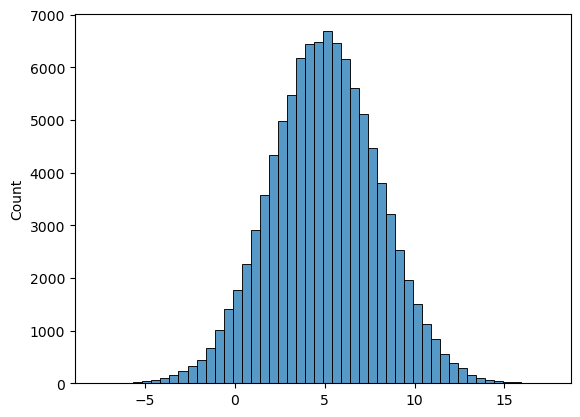

In [50]:
a_normal = np.random.normal(loc=5, scale=3, size=100000)
sns.histplot (a_normal, bins = 50)

### `np.random.multinomial`

Could be used for sampling from binomial distribution 

In [51]:
pvals= [.6, .4] # (n, pvals, size=None)
flips= np.random.multinomial(10, pvals, 100000)[:,0] # n means from 10 trials, size means how many time is repeated
flips[:20]

array([7, 6, 4, 5, 7, 7, 5, 7, 7, 6, 8, 9, 8, 6, 7, 5, 5, 7, 8, 6])

<AxesSubplot:ylabel='Count'>

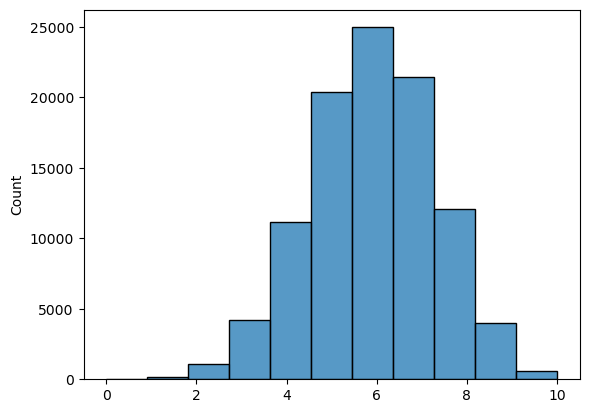

In [52]:
sns.histplot (flips, bins = 11)

In [53]:
# check there is cases on edges 
sum(flips==0), sum(flips==10)

(10, 580)

In [54]:
# recall the background probability distribution 
bin_distr

[0.00010485760000000006,
 0.0015728640000000006,
 0.010616832000000005,
 0.042467328000000006,
 0.11147673600000003,
 0.20065812480000003,
 0.25082265600000003,
 0.21499084799999998,
 0.12093235199999998,
 0.04031078399999999,
 0.006046617599999997]

<BarContainer object of 11 artists>

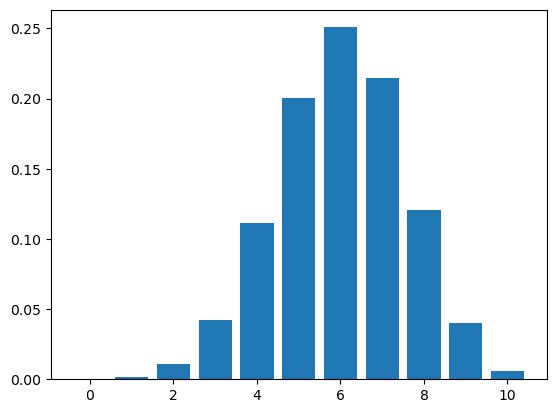

In [55]:
plt.bar(np.arange(11),bin_distr)

# Statistical analysis

We have general dataset (<генеральна сукупність> which is UNKNOWN) and sample dataset (observed <вибірка>). 

We may calculate statistical distribution of sample dataset calculate its characteristrics e.g. the mean (<середня вибіркова для кількісної ознаки>), or sample proportion for a quality feature  (<вибіркова частка для якісної ознаки>) and there are several theorems that allow to estimate the characteristics of distribution of general data set.

## Central limit theorem 

Note: The mean/proportion of sample dataset is **random variable**. and so we may talk about its probability distribution. 

For instance, let's have sampling 50 random integer values from uniform distribution and calculate the mean value. Then iterate this process let's say $n= 1000$ times. This way we get sample dataset of these means values. It appears the larger sample size of this data set the higher confidence that it has normal distribution 



In [56]:
# generate sample dataset of 1000 means values of 50 randomvalues from unifrom distribution.
means= [np.random.randint(20,size= (50)).mean() for i in range (1000)]
means[:10]

[10.28, 8.62, 9.86, 9.7, 9.98, 8.68, 9.24, 9.58, 8.78, 9.16]

<AxesSubplot:ylabel='Count'>

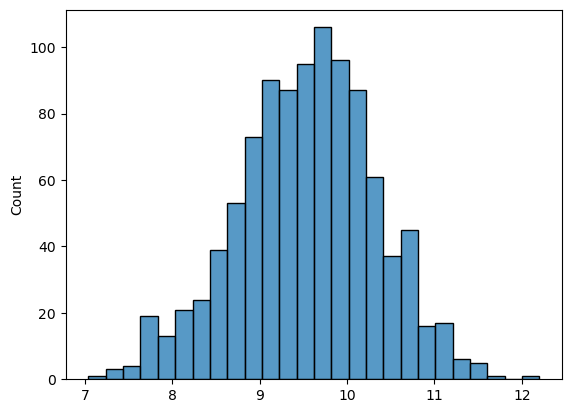

In [57]:
sns.histplot(means)

This is simple visualization of **Central Limit Theorem**.

In general the central limit theorem states that the sum of some number of independent and identically distributed random variables with finite variance will **tend to a normal distribution  as the number of these variables increases**.

There are variaty of formulations and extensions.

Usually it is about `sum` but all them are applicable for `mean/proportion`

<AxesSubplot:ylabel='Count'>

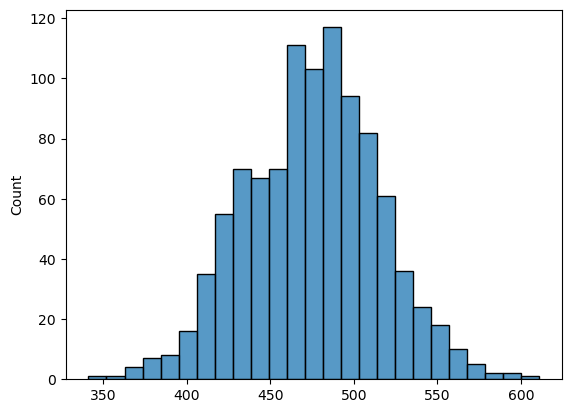

In [58]:
# lets visualize the distribution of sums values 
sns.histplot([np.random.randint(20,size= (50)).sum() for i in range (1000)])

Other samples of of Central Limit Theorem:  
- The probability distribution of the total distance traveled in a **random walk** (biased or unbiased) will follow a **normal distribution**.
- **Flipping a large number of coins** will have a **normal distribution for the total number of heads** (or reverses).

### Random walks 

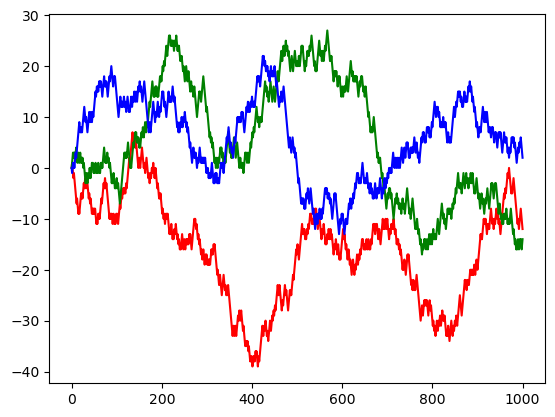

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import random
def randomwalk1D(n):
    x, y = 0, 0
    # Generate the time points [1, 2, 3, ... , n]
    timepoints = np.arange(n + 1)
    positions = [y]
    directions = ["UP", "DOWN"]
    for i in range(1, n + 1):
        # Randomly select either UP or DOWN
        step = random.choice(directions)
        
        # Move the object up or down
        if step == "UP":
            y += 1
        elif step == "DOWN":
            y -= 1
        # Keep track of the positions
        positions.append(y)
    return timepoints, positions
rw1 = randomwalk1D(1000)
rw2 = randomwalk1D(1000)
rw3 = randomwalk1D(1000)
plt.plot(rw1[0], rw1[1], 'r-', label="rw1")
plt.plot(rw2[0], rw2[1], 'g-', label="rw2")
plt.plot(rw3[0], rw3[1], 'b-', label="rw3")
plt.show()

In [60]:
# observe total distance of each walk
rw_sums = [np.array(randomwalk1D(50)[1]).sum() for i in range (1000)]
rw_sums[:10]

[-333, -135, -61, 69, 77, 351, 207, 19, -65, -113]

<AxesSubplot:ylabel='Count'>

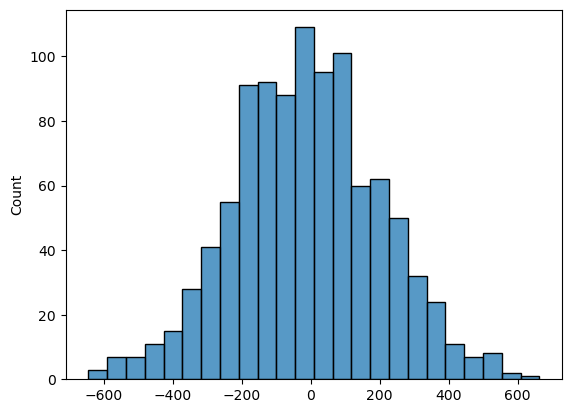

In [61]:
# visualize the distribution of values of total distances
sns.histplot(rw_sums)

## Statistical Estimation 

Because real-world values are often the balanced sum of many unobservable random events, the central limit theorem also partially explains why **the normal distribution occurs quite often**. 

It also justifies the use of the **approximation for large statistical samples to the normal distribution** in controlled experiments.

To recall, <br>
**Statement**: The larger sample dataset size the higher confidence that **mean/proportion** has normal distribution. 

The parameters $a$ and $\sigma$ of this distribution are vary depending on what parameter is observed and how the sampling is  executed (e.g. with repeating or not).

**Theorem for mean** $x_g$ (mean of general dataset) in case of repeating sampling: 
$$a = x_g, \, \sigma= \sqrt{D_g/n}$$

**Theorem for proportion** $p = M/N$ (proporrtion of general dataset) in case of repeating sampling: 
$$a = p, \, \sigma= \sqrt{pq/n}, \, q= 1-p$$

For non-repearting sampling the expressions have additional contributors

- for mean: $a = x_g, \, \sigma= \sqrt{\frac {D_g}{n}\frac {N-n}{N-1}}$
- for proportion: $a = x_g, \, \sigma= \sqrt{\frac {pq}{n}\frac {N-n}{N-1}}$

Note: **Trick approach:** Since we may calculate the probability of variation of sample mean/proportion $P(|a-x_s| <  \epsilon)$ , so it allows compute the **confidence the parameter of general dataset will be in certain range** $P(|x_s-a| < \epsilon)$  
<br> This range depends on size of sample distribution (the large sample size the smalller range) 



[Binomial Distribution](https://www.investopedia.com/terms/b/binomialdistribution.asp)

[Python Combinatorics Functions](https://vegibit.com/python-combinatorics-functions/)

[Probability Density Function](https://byjus.com/maths/probability-density-function/)
    
[Random Walk in Python (1D, 2D, and 3D with Examples)](https://www.codingem.com/random-walk-in-python/)
